# K-Nearest Neighbors Classifier

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## K-Nearest Neighbors - Pre-Feature Selection

### Load Datasets

In [2]:
train_df = pd.read_csv("../data_format1/use_data/merged_df.csv")
test_df = pd.read_csv('../data_format1/test_merged_df.csv')

### Prepare Train Test Split

In [3]:
train_complete, test_complete = train_test_split(train_df, test_size=0.2, random_state=550)
X_train = train_complete.drop(['label'], axis=1)
y_train = train_complete['label']

### K-Nearest Neighbors Model (sklearn)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluate

In [5]:
X_test = test_complete.drop(['label'], axis=1)
y_test = np.asarray(test_complete['label'])

In [6]:
y_preds = neigh.predict(X_test)
y_prob = neigh.predict_proba(X_test)[:,1]

### Metrics

In [7]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, confusion_matrix, auc

In [8]:
acc1 = accuracy_score(y_test, y_preds)
prec1, rec1, fbeta1, sup1 = precision_recall_fscore_support(y_test, y_preds)
rocauc1 = roc_auc_score(y_test, y_prob)
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
cm1 = confusion_matrix(y_test, y_preds)

In [9]:
print(f'Accuracy: {acc1}')
print(f'Precision: {prec1}')
print(f'Recall: {rec1}')
print(f'F1-Score: {fbeta1}')
print(f'ROC-AUC: {rocauc1}')

Accuracy: 0.961038961038961
Precision: [0.96 1.  ]
Recall: [1.  0.4]
F1-Score: [0.97959184 0.57142857]
ROC-AUC: 0.8916666666666667


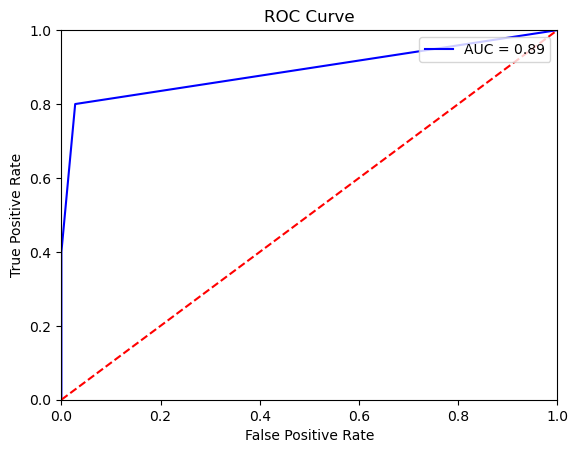

In [10]:
# ROC
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

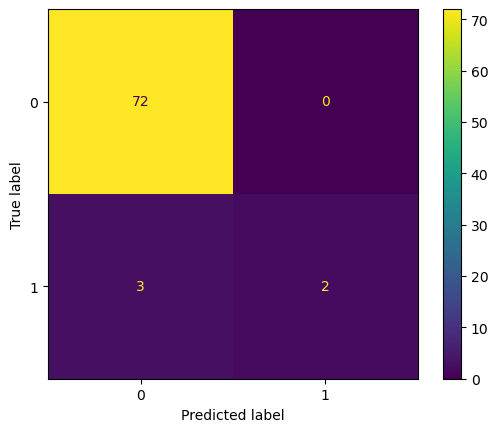

In [11]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm1)
disp.plot()

## K-Nearest Neighbors - Post-Feature Selection

In [12]:
train50_df = pd.read_csv('./df_50.csv')

In [13]:
train50, test50 = train_test_split(train50_df, test_size=0.2, random_state=550)
X_train50 = train50.drop(['label'], axis=1)
y_train50 = train50['label']

In [14]:
neigh50 = KNeighborsClassifier(n_neighbors=3)
neigh50.fit(X_train50, y_train50)

KNeighborsClassifier(n_neighbors=3)

In [15]:
X_test50 = test50.drop(['label'], axis=1)
y_test50 = test50['label']

In [16]:
y_pred50 = neigh50.predict(X_test50)
y_prob50 = neigh50.predict_proba(X_test50)[:,1]

In [17]:
acc2 = accuracy_score(y_test50, y_pred50)
prec2, rec2, fbeta2, sup2 = precision_recall_fscore_support(y_test50, y_pred50)
rocauc2 = roc_auc_score(y_test50, y_prob50)
fpr2, tpr2, threshold2 = roc_curve(y_test50, y_prob50)
roc_auc2 = auc(fpr2, tpr2)
cm2 = confusion_matrix(y_test50, y_pred50)

In [18]:
print(f'Accuracy: {acc2}')
print(f'Precision: {prec2}')
print(f'Recall: {rec2}')
print(f'F1-Score: {fbeta2}')
print(f'ROC-AUC: {rocauc2}')

Accuracy: 0.961038961038961
Precision: [0.96 1.  ]
Recall: [1.  0.4]
F1-Score: [0.97959184 0.57142857]
ROC-AUC: 0.8875000000000001


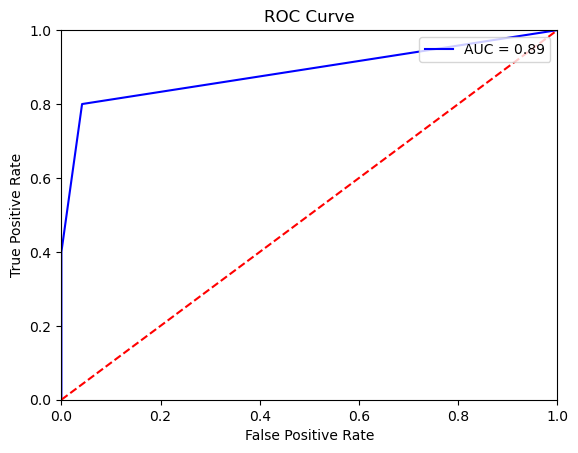

In [19]:
# ROC
plt.title('ROC Curve')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'upper right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

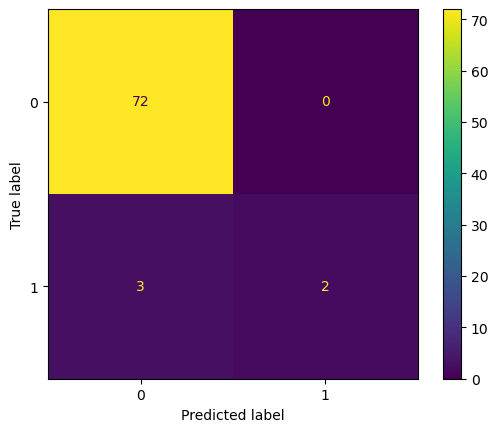

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm2)
disp.plot()

## K-Nearest Neighbors - PCA

In [35]:
from sklearn.decomposition import PCA

X_pca = train_df.copy()
y_pca = train_df['label']

In [36]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_pca)

In [37]:
pcaDF = pd.DataFrame(data=principalComponents, columns=['pca1','pca2','pca3'])
finalDF = pd.concat([pcaDF, y_pca], axis=1)

In [38]:
finalDF['label'] = finalDF['label'].fillna(0)

In [39]:
finalDF.head()

,pca1,pca2,pca3,label
0,175510.079153,1808.310237,-2003.843927,0
1,175510.079153,1808.310237,-2003.843927,0
2,175510.079153,1808.310293,-2003.843881,0
3,175510.079054,1808.311550,-2003.838403,0
4,175510.079054,1808.311550,-2003.838403,0


In [40]:
pcaTrain, pcaTest = train_test_split(finalDF, test_size=0.2, random_state=550)

In [41]:
X_trainPCA = pcaTrain.drop(['label'], axis=1)
y_trainPCA = pcaTrain['label']

In [42]:
neighPCA = KNeighborsClassifier(n_neighbors=3)
neighPCA.fit(X_trainPCA, y_trainPCA)

KNeighborsClassifier(n_neighbors=3)

In [43]:
X_testPCA = pcaTest.drop(['label'], axis=1)
y_testPCA = pcaTest['label']

In [44]:
y_predPCA = neighPCA.predict(X_testPCA)
y_probPCA = neighPCA.predict_proba(X_testPCA)[:,1]

In [45]:
accPCA = accuracy_score(y_testPCA, y_predPCA)
precPCA, recPCA, fbetaPCA, supPCA = precision_recall_fscore_support(y_testPCA, y_predPCA)
rocaucPCA = roc_auc_score(y_testPCA, y_probPCA)
fprPCA, tprPCA, thresholdPCA = roc_curve(y_testPCA, y_probPCA)
roc_aucPCA = auc(fprPCA, tprPCA)
cmPCA = confusion_matrix(y_testPCA, y_predPCA)

In [46]:
print(f'Accuracy: {accPCA}')
print(f'Precision: {precPCA}')
print(f'Recall: {recPCA}')
print(f'F1-Score: {fbetaPCA}')
print(f'ROC-AUC: {rocaucPCA}')

Accuracy: 0.961038961038961
Precision: [0.96 1.  ]
Recall: [1.  0.4]
F1-Score: [0.97959184 0.57142857]
ROC-AUC: 0.8916666666666667


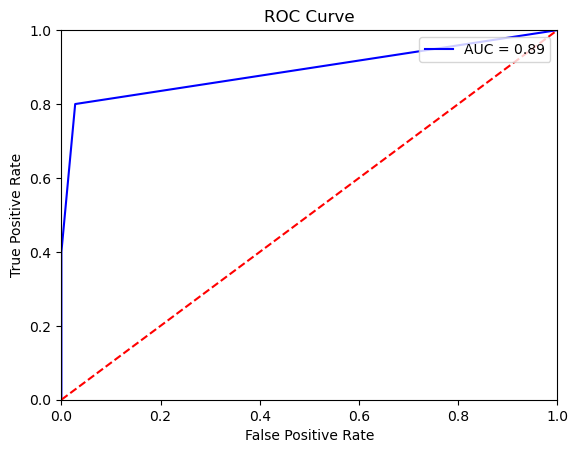

In [47]:
# ROC
plt.title('ROC Curve')
plt.plot(fprPCA, tprPCA, 'b', label = 'AUC = %0.2f' % roc_aucPCA)
plt.legend(loc = 'upper right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

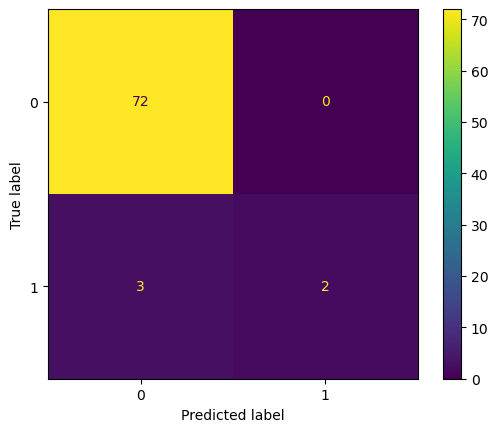

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix = cmPCA)
disp.plot()

